In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import linear_regression
import datetime
import random
import tslearn
import scipy
from numpy.polynomial.polynomial import polyfit
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import linear_model
random.seed(0)

In [34]:
! python --version

Python 3.12.7


In [35]:
from print_versions import print_versions
#from pandas import DataFrame
import sys

print(sys. version)
print_versions(globals())

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
pandas==2.2.3
numpy==1.26.4
tslearn==0.6.3
scipy==1.15.1


# Bank Reserves

In [36]:
br_poor = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_poor.csv", header=None)
br_middle = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_middle.csv", header=None)
br_rich = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_outputs_rich.csv", header=None)
br_inputs = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/bank_reserves_inputs.csv", header=None)

In [37]:
slopes_scipy = []
#slopes_lr = []
#intercepts_lr = []
for index, row in br_poor.iterrows():
    y = np.array(row)
    x = np.arange(0, y.size)
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y)
    #slope, intercept = linear_regression(x, y, proportional=True)
    slopes_scipy.append(a)
    #slopes_lr.append(slope)
    #intercepts_lr.append(intercept)

C:\Users\met48\AppData\Local\Temp\ipykernel_19492\2192925672.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


In [38]:
slopes_scipy = np.concatenate(slopes_scipy, axis=0)

In [39]:
br_inputs_arr = br_inputs.iloc[:, 0].to_numpy()

In [44]:
br_inputs_arr

array([76.02257126, 78.36975458, 98.83249299, ..., 51.83870099,
       61.8066298 , 67.07348799])

In [46]:
br_inputs_arr.reshape(-1, 1)

array([[76.02257126],
       [78.36975458],
       [98.83249299],
       ...,
       [51.83870099],
       [61.8066298 ],
       [67.07348799]])

In [45]:
slopes_scipy

array([ 0.50608246,  0.40145116, -0.        , ...,  1.3723984 ,
        0.96106399,  0.82557411])

In [42]:
reg = linear_model.LinearRegression().fit(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))
reg.score(br_inputs_arr.reshape(-1, 1), slopes_scipy.reshape(-1, 1))

0.8899843314952712

In [43]:
scipy.stats.pearsonr(br_inputs_arr, slopes_scipy)

PearsonRResult(statistic=array([-0.94338981]), pvalue=array([0.]))

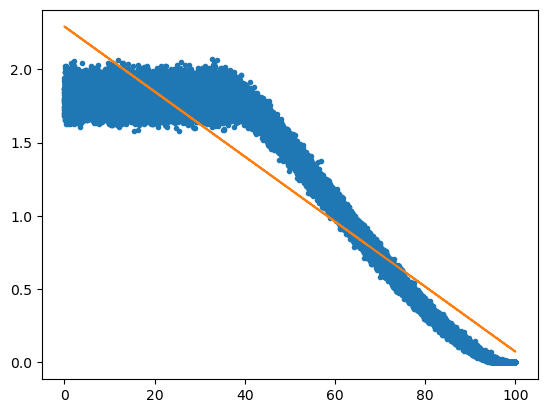

In [35]:
b, m = polyfit(br_inputs_arr, slopes_scipy, 1)

plt.plot(br_inputs_arr, slopes_scipy, '.')
plt.plot(br_inputs_arr, b + m * br_inputs_arr, '-')
plt.show()

In [37]:
br_inputs_class = []
for val in slopes_scipy:
    if val < 0.5:
        br_inputs_class.append("lt 0.5")
    elif val >= 0.5 and val < 1:
        br_inputs_class.append("0.5-1")
    elif val >= 1 and val < 1.5:
        br_inputs_class.append("1-1.5")
    else:
        br_inputs_class.append("gt 1.5")

In [43]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs_arr, br_inputs_class, test_size=0.2, random_state=1) 

In [49]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1, 1),y_train)
y_pred = clf.predict(X_test.reshape(-1, 1))

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97015


# Epstein Civil Violence

In [47]:
ecv_active = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_active.csv", header=None)
ecv_jailed = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_jailed.csv", header=None)
ecv_quiet = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_outputs_quiet.csv", header=None)
ecv_inputs = pd.read_csv("C:/Users/met48/Desktop/TS-Clustering/SimData/epsteinCV_inputs.csv", header=None, sep=" ")

In [48]:
ecv_inputs

0         1         2
0      0.579364  0.362797  0.045004
1      0.905778  0.049225  0.769210
2      0.761473  0.167152  0.565592
3      0.979122  0.007172  0.161529
4      0.521911  0.427794  0.762568
...         ...       ...       ...
50357  0.988652  0.004317  0.274946
50358  0.726030  0.203366  0.597790
50359  0.849297  0.057407  0.704192
50360  0.976113  0.002261  0.987066
50361  0.946500  0.014863  0.399148

[50362 rows x 3 columns]

In [49]:
slopes_scipy = []
#slopes_lr = []
#intercepts_lr = []
for index, row in ecv_active.iterrows():
    y = np.array(row)
    x = np.arange(0, y.size)
    x = x[:,np.newaxis]
    a, _, _, _ = np.linalg.lstsq(x, y)
    #slope, intercept = linear_regression(x, y, proportional=True)
    slopes_scipy.append(a)
    #slopes_lr.append(slope)
    #intercepts_lr.append(intercept)

C:\Users\met48\AppData\Local\Temp\ipykernel_19492\2294856357.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


In [50]:
slopes_scipy = np.concatenate(slopes_scipy, axis=0)
br_inputs_arr = ecv_inputs.to_numpy()

In [52]:
br_inputs_arr.reshape(-1, 3)

array([[0.57936369, 0.36279704, 0.0450042 ],
       [0.90577819, 0.04922511, 0.76920957],
       [0.7614733 , 0.16715225, 0.5655921 ],
       ...,
       [0.84929667, 0.05740677, 0.70419192],
       [0.97611302, 0.00226105, 0.98706616],
       [0.94649952, 0.01486282, 0.39914755]])

In [53]:
reg = linear_model.LinearRegression().fit(br_inputs_arr.reshape(-1, 3), slopes_scipy.reshape(-1, 1))
reg.score(br_inputs_arr.reshape(-1, 3), slopes_scipy.reshape(-1, 1))

0.30103337875167124

In [54]:
br_inputs_class = []
for val in slopes_scipy:
    if val < 2:
        br_inputs_class.append("lt 0.5")
    elif val >= 2 and val < 4:
        br_inputs_class.append("0.5-1")
    elif val >= 4 and val < 6:
        br_inputs_class.append("1-1.5")
    else:
        br_inputs_class.append("gt 1.5")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(br_inputs_arr, br_inputs_class, test_size=0.2, random_state=1) 

In [57]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train.reshape(-1, 3),y_train)
y_pred = clf.predict(X_test.reshape(-1, 3))

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9478804725503822


# Forest Fire

In [59]:
def import_ff_data(filename):
    expected_columns=155
    data = []
    with open(filename, 'r') as file:
        for line in file:
            row = line.strip().split(',')
            if len(row) < expected_columns:
                row += [np.nan] * (expected_columns - len(row))
            data.append(row)
    df = pd.DataFrame(data)
    def fill_last_valid(row):
        for i in range(1, len(row)):
            if pd.isna(row[i]):
                row[i] = row[i - 1]  
        return row
    df_filled = df.apply(fill_last_valid, axis=1)
    return df_filled

In [61]:
ff_onfire = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_onfire.csv")
print("check 1")
ff_fine = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_fine.csv")
print("check 2")
ff_burned = import_ff_data("C:/Users/met48/Desktop/TS-Clustering/SimData/forest_fire_outputs_burned.csv")

check 1
check 2
